In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ultimate-spotify-tracks-db/SpotifyFeatures.csv


In [2]:
df = pd.read_csv("/kaggle/input/ultimate-spotify-tracks-db/SpotifyFeatures.csv")
df.sample(5)

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
113677,Pop,One Direction,Act My Age,4bqIFmnVAsndYWuXxAwQet,63,0.00287,0.495,198653,0.883,0.000023,F#,0.0978,-4.722,Major,0.0402,135.899,4/4,0.642
166903,Rock,George Michael,Faith - Remastered,0HEmnAUT8PHznIAAmVXqFJ,75,0.00940,0.887,193200,0.480,0.000036,B,0.0662,-11.994,Major,0.1170,95.846,4/4,0.607
77571,Children’s Music,6LACK,Disconnect,5dgkSJAuFXZnwz7OAFUnIk,64,0.57600,0.457,265883,0.337,0.000009,F#,0.1900,-10.825,Minor,0.1660,66.933,3/4,0.184
93959,Indie,LÉON,You And I,4uUxCAiID9coIlJKk33yq0,67,0.00240,0.554,224064,0.786,0.000000,A,0.1480,-4.288,Major,0.0491,120.057,4/4,0.358
123014,Reggae,Bob Marley & The Wailers,Jamming - Exodus 40 Mix,78pKxMpbcLSh9wVClRhSs1,52,0.42500,0.917,210760,0.497,0.003440,B,0.0734,-10.590,Minor,0.1850,123.601,4/4,0.811


In [3]:
df.describe()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,232725.000000,232725.000000,232725.000000,2.327250e+05,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000
mean,41.127502,0.368560,0.554364,2.351223e+05,0.570958,0.148301,0.215009,-9.569885,0.120765,117.666585,0.454917
std,18.189948,0.354768,0.185608,1.189359e+05,0.263456,0.302768,0.198273,5.998204,0.185518,30.898907,0.260065
min,0.000000,0.000000,0.056900,1.538700e+04,0.000020,0.000000,0.009670,-52.457000,0.022200,30.379000,0.000000
25%,29.000000,0.037600,0.435000,1.828570e+05,0.385000,0.000000,0.097400,-11.771000,0.036700,92.959000,0.237000
50%,43.000000,0.232000,0.571000,2.204270e+05,0.605000,0.000044,0.128000,-7.762000,0.050100,115.778000,0.444000
75%,55.000000,0.722000,0.692000,2.657680e+05,0.787000,0.035800,0.264000,-5.501000,0.105000,139.054000,0.660000
max,100.000000,0.996000,0.989000,5.552917e+06,0.999000,0.999000,1.000000,3.744000,0.967000,242.903000,1.000000


In [4]:
df.isna().sum()

genre               0
artist_name         0
track_name          1
track_id            0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64

In [5]:
df.genre.value_counts()

genre
Comedy              9681
Soundtrack          9646
Indie               9543
Jazz                9441
Pop                 9386
Electronic          9377
Children’s Music    9353
Folk                9299
Hip-Hop             9295
Rock                9272
Alternative         9263
Classical           9256
Rap                 9232
World               9096
Soul                9089
Blues               9023
R&B                 8992
Anime               8936
Reggaeton           8927
Ska                 8874
Reggae              8771
Dance               8701
Country             8664
Opera               8280
Movie               7806
Children's Music    5403
A Capella            119
Name: count, dtype: int64

In [6]:
df.duration_ms.describe()

count    2.327250e+05
mean     2.351223e+05
std      1.189359e+05
min      1.538700e+04
25%      1.828570e+05
50%      2.204270e+05
75%      2.657680e+05
max      5.552917e+06
Name: duration_ms, dtype: float64

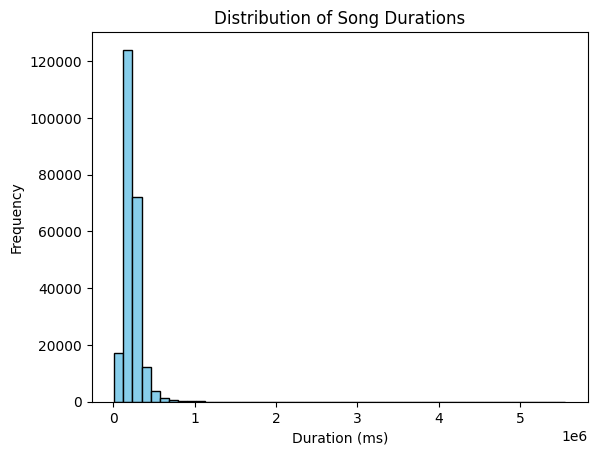

In [7]:
import matplotlib.pyplot as plt

plt.hist(df['duration_ms'], bins=50, color='skyblue', edgecolor='black')
plt.xlabel("Duration (ms)")
plt.ylabel("Frequency")
plt.title("Distribution of Song Durations")
plt.show()


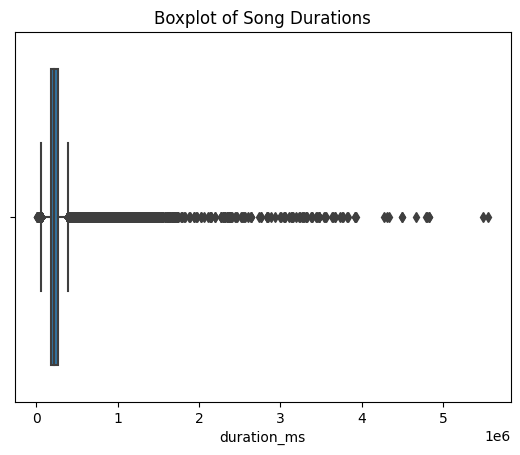

In [8]:
import seaborn as sns

sns.boxplot(x=df['duration_ms'])
plt.title("Boxplot of Song Durations")
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


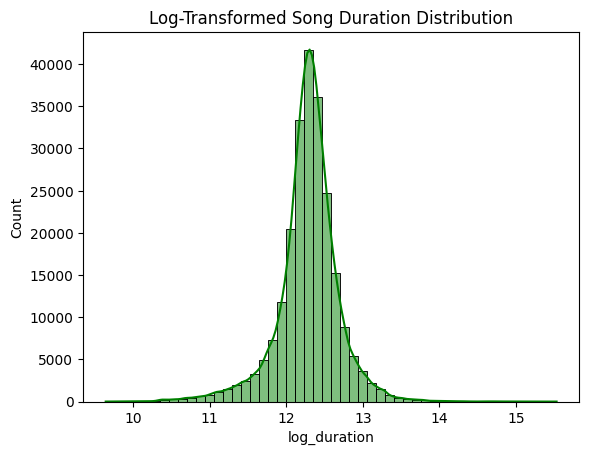

In [9]:
import numpy as np
df['log_duration'] = np.log1p(df['duration_ms'])

sns.histplot(df['log_duration'], bins=50, kde=True, color="green")
plt.title("Log-Transformed Song Duration Distribution")
plt.show()

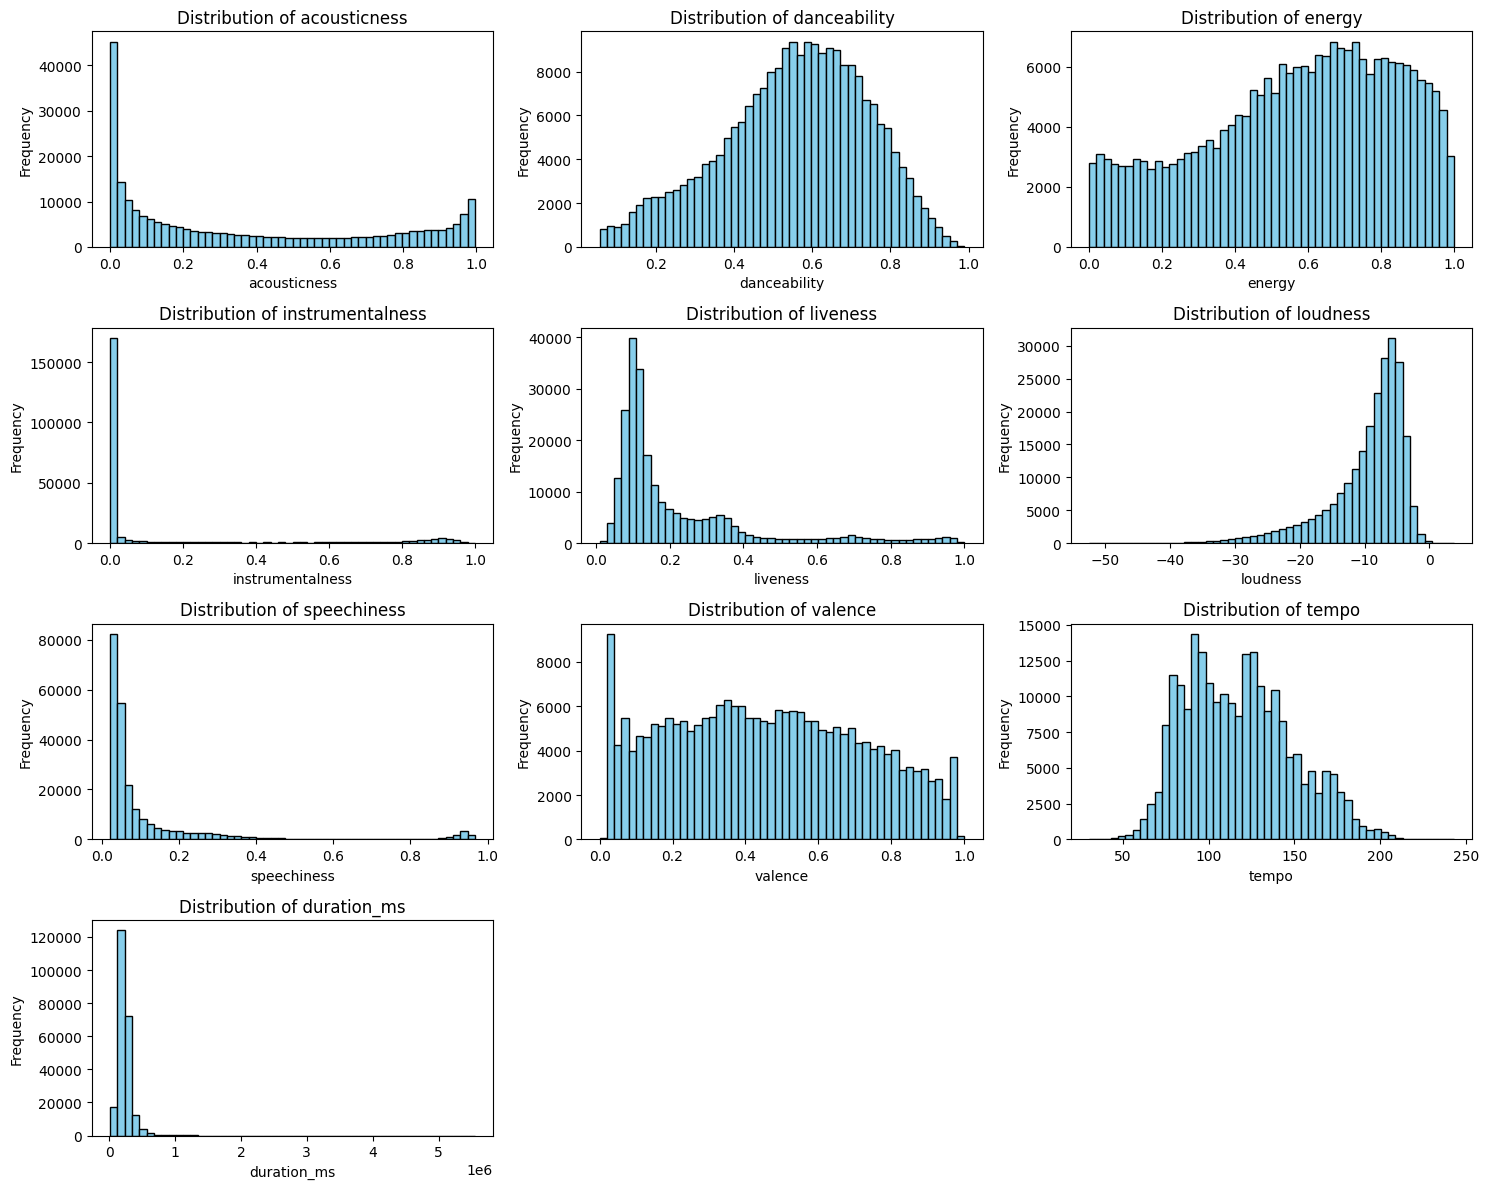

In [10]:
import matplotlib.pyplot as plt

features = [
    'acousticness', 'danceability', 'energy', 'instrumentalness',
    'liveness', 'loudness', 'speechiness', 'valence', 'tempo', 'duration_ms'
]

plt.figure(figsize=(15, 12))

for i, feature in enumerate(features, 1):
    plt.subplot(4, 3, i)
    plt.hist(df[feature], bins=50, color='skyblue', edgecolor='black')
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.title(f"Distribution of {feature}")

plt.tight_layout()
plt.show()
